In [1]:
import requests
import pandas as pd

Funcion para importar datos de velas japonesas desde crypto watch. [Aqui su documentación.](https://docs.cryptowat.ch/rest-api/)

In [2]:
def get_historic_price(symbol, exchange='bitfinex', after='2021-12-23'):
    url = f'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'
    resp = requests.get(url, params={
        'period': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'        
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [3]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2021-12-17 14:42:58.777426')

**Bitcoin Prices from lastweek** (Hourly)

In [4]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [5]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2021-12-17 15:00:00,46973.26,47011.03,45738.00,45947.75,306.931378,1.419784e+07
2021-12-17 16:00:00,45923.10,46624.34,45478.74,46568.22,270.214631,1.243524e+07
2021-12-17 17:00:00,46543.27,47446.10,46440.61,47118.52,268.339827,1.260883e+07
2021-12-17 18:00:00,47076.18,47076.18,46640.00,46779.08,58.410567,2.736111e+06
2021-12-17 19:00:00,46741.95,47069.00,46634.18,47010.22,37.125372,1.736144e+06


<AxesSubplot:xlabel='CloseTime'>

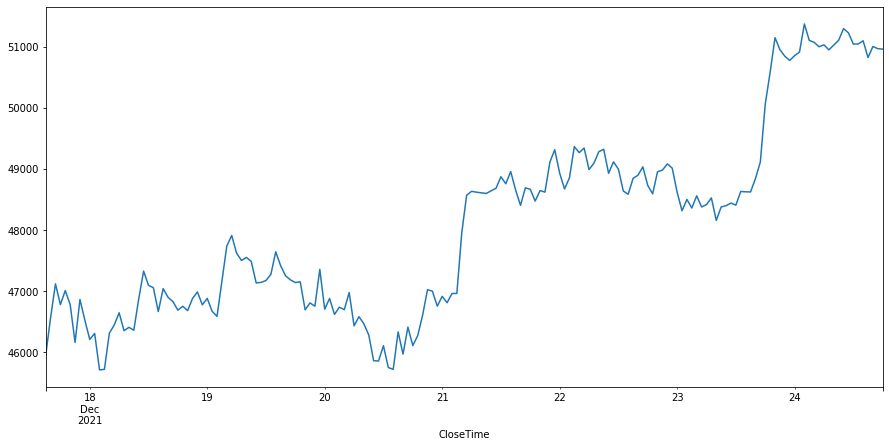

In [6]:
btc['ClosePrice'].plot(figsize=(15, 7))

**Ethereum Prices from lastweek** (Hourly)

In [8]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

In [9]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2021-12-17 15:00:00,3819.22,3819.22,3695.19,3734.71,7823.121601,2.933052e+07
2021-12-17 16:00:00,3737.81,3844.94,3703.98,3834.82,1837.007413,6.951272e+06
2021-12-17 17:00:00,3837.60,3947.37,3829.10,3909.19,2932.821049,1.145678e+07
2021-12-17 18:00:00,3912.53,3912.53,3843.11,3859.85,439.642685,1.702644e+06
2021-12-17 19:00:00,3854.55,3912.46,3854.55,3905.38,652.560438,2.533748e+06


<AxesSubplot:xlabel='CloseTime'>

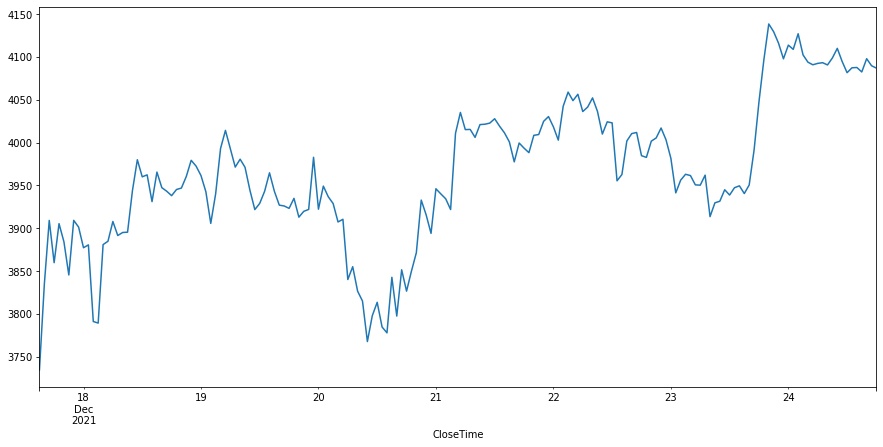

In [10]:
eth['ClosePrice'].plot(figsize=(15, 7))